Author: <font color="blue">Josep Monclús Carrasco</font>

E-mail: <font color="blue">josep.monclus01@estudiant.upf.edu</font>

Date: <font color="blue">7/10/2021</font>

In [540]:
#This is only for improve the presentation and avoid the warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Exploratory data analysis 

In [541]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [542]:
input_dataset = pd.read_csv("data/device_db.csv", sep=",")
#I modified the path device_db.csv to data/device_db.csv

## 1.1. Data types and simple statistics

In [543]:
print(input_dataset.columns)
input_dataset.head(3)

Index(['PURCHASED_DEVICE', 'DEVICE_VALUE', 'LAST_DEVICE_CHANGE',
       'DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
       'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
       'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2',
       'VOICE_TRAFFIC_MONTH_3', 'VOICE_TRAFFIC_MONTH_4',
       'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6', 'BILLING_MONTH_1',
       'BILLING_MONTH_2', 'BILLING_MONTH_3', 'BILLING_MONTH_4',
       'BILLING_MONTH_5', 'BILLING_MONTH_6', 'DEVICE_COST_MONTH_1',
       'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3', 'DEVICE_COST_MONTH_4',
       'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6', 'LINE_ACTIVATION_DATE',
       'MONTHS_LAST_DEVICE', 'DURATION_LINE', 'PREVIOUS_DEVICE_MODEL',
       'PREVIOUS_DEVICE_MANUF', 'PREVIOUS_DEVICE_BRAND'],
      dtype='object')


,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.5,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.7,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.1,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


We can see looking to the first records that we have mixed atribute data non-dependency oriented, we have text data, numeric data, and dates but it seems that they are not in a date format we are going to look at the data types

In [544]:
print("Dimension of the dataset:",input_dataset.shape,"\n")
#First of all we convert the dates columns into date format
input_dataset["LINE_ACTIVATION_DATE"] = pd.to_datetime(input_dataset["LINE_ACTIVATION_DATE"],format='%Y%m%d')
input_dataset["LAST_DEVICE_CHANGE"] = pd.to_datetime(input_dataset["LAST_DEVICE_CHANGE"],format='%Y%m%d')
#We loop the columns to see its type
for col_name in input_dataset.columns:
    print("Column",col_name,"has type",input_dataset[col_name].dtype)

Dimension of the dataset: (10000, 33) 

Column PURCHASED_DEVICE has type object
Column DEVICE_VALUE has type float64
Column LAST_DEVICE_CHANGE has type datetime64[ns]
Column DATA_TRAFFIC_MONTH_1 has type float64
Column DATA_TRAFFIC_MONTH_2 has type float64
Column DATA_TRAFFIC_MONTH_3 has type float64
Column DATA_TRAFFIC_MONTH_4 has type float64
Column DATA_TRAFFIC_MONTH_5 has type float64
Column DATA_TRAFFIC_MONTH_6 has type float64
Column VOICE_TRAFFIC_MONTH_1 has type float64
Column VOICE_TRAFFIC_MONTH_2 has type float64
Column VOICE_TRAFFIC_MONTH_3 has type float64
Column VOICE_TRAFFIC_MONTH_4 has type float64
Column VOICE_TRAFFIC_MONTH_5 has type float64
Column VOICE_TRAFFIC_MONTH_6 has type float64
Column BILLING_MONTH_1 has type float64
Column BILLING_MONTH_2 has type float64
Column BILLING_MONTH_3 has type float64
Column BILLING_MONTH_4 has type float64
Column BILLING_MONTH_5 has type float64
Column BILLING_MONTH_6 has type float64
Column DEVICE_COST_MONTH_1 has type float64
Col

In [545]:
for col_name in input_dataset.columns:
    #If the column is float64 the compute the numerical statistics
    if input_dataset[col_name].dtype == "float64":
        print(col_name,"Mean:",np.mean(input_dataset[col_name]),"Median:",input_dataset[col_name].median(),"Max:",np.max(input_dataset[col_name]),"Min",np.min(input_dataset[col_name]),"\n")

DEVICE_VALUE Mean: 750.4842105263158 Median: 393.0 Max: 9057.0 Min 15.0 

DATA_TRAFFIC_MONTH_1 Mean: 3481.825663377724 Median: 1208.7280500000002 Max: 127017.59 Min 0.0 

DATA_TRAFFIC_MONTH_2 Mean: 3649.9577950784233 Median: 1294.9508 Max: 111948.84 Min 0.0 

DATA_TRAFFIC_MONTH_3 Mean: 3653.4269589293094 Median: 1310.6748 Max: 111948.84 Min 0.0 

DATA_TRAFFIC_MONTH_4 Mean: 3269.440625173109 Median: 1176.5393 Max: 87856.414 Min 0.0 

DATA_TRAFFIC_MONTH_5 Mean: 3673.3683414304946 Median: 1287.094 Max: 121834.81 Min 0.0 

DATA_TRAFFIC_MONTH_6 Mean: 3427.689578208464 Median: 1277.1163 Max: 90550.609 Min 0.0 

VOICE_TRAFFIC_MONTH_1 Mean: 154.8522102255611 Median: 84.049999 Max: 4220.1001 Min 0.0 

VOICE_TRAFFIC_MONTH_2 Mean: 142.56787687317018 Median: 74.900002 Max: 3132.1001 Min 0.0 

VOICE_TRAFFIC_MONTH_3 Mean: 141.71245755066127 Median: 74.400002 Max: 2992.5 Min 0.0 

VOICE_TRAFFIC_MONTH_4 Mean: 143.1492345468576 Median: 75.099998 Max: 3163.3 Min 0.0 

VOICE_TRAFFIC_MONTH_5 Mean: 154.277

I used .median() in case of np.median() because by default .median() don't take in consideration the NaNs and don't apear the Median as NaN

In [546]:
input_dataset.describe(include="all")

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
count,9853,9690.000000,7682,8868.000000,8841.000000,8846.000000,8817.000000,8866.000000,8535.000000,8868.000000,...,9992.00000,9989.000000,9987.000000,9979.000000,9179,7682.000000,9179.000000,6169,6169,6169
unique,101,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2546,NaN,NaN,580,68,5
top,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,NaN,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2014-08-29 00:00:00,NaN,NaN,iPhone 7,Samsung Korea,Samsung
freq,5379,NaN,677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,118,NaN,NaN,425,1928,1877
first,NaN,NaN,2012-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1992-08-04 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2019-04-16 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,750.484211,NaN,3481.825663,3649.957795,3653.426959,3269.440625,3673.368341,3427.689578,154.852210,...,11.71326,11.554371,12.510864,12.979012,NaN,25.338323,62.368341,NaN,NaN,NaN
std,NaN,979.710272,NaN,6364.542706,6444.357603,6382.603999,5675.546606,6589.399406,5885.423022,218.250590,...,44.43260,34.175962,38.875688,39.528025,NaN,12.817354,52.072895,NaN,NaN,NaN
min,NaN,15.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,NaN,-5.000000,0.000000,NaN,NaN,NaN
25%,NaN,297.000000,NaN,51.923114,46.542538,44.900850,35.689415,45.358936,75.256077,26.700001,...,0.00000,0.000000,0.000000,0.000000,NaN,17.000000,21.000000,NaN,NaN,NaN


We use the argument include="all" to describe all atributes, categorical and numeric in the dataset we can see that we have some Nan Values

As we can see with the describe function it do not compute the median, but on the other hand with the describe function we have the std, and the quantiles and furthermore the result apear in a table. So it depends on what do you want, if you are searching for a rapid description of the atributes maybe .describe is what are you looking for, but if you need a specific statistic maybe you have to create a function.

## 1.2. Inventory of device models

In [547]:
print(input_dataset.PURCHASED_DEVICE.value_counts()/len(input_dataset.PURCHASED_DEVICE),"\n")
print(input_dataset.PREVIOUS_DEVICE_MODEL.value_counts()/len(input_dataset.PREVIOUS_DEVICE_MODEL))

TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07    0.5379
TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P1769/07    0.0451
TGAL03462000_ALCATEL 5033J SMART PRETO                   0.0353
TGSA32162007_SAMSUNG J610G SMART PRETO PPB/PI107/04      0.0255
TGSA31962007_SAMSUNG J410G SMART PRETO PPB/PI107/04      0.0223
                                                          ...  
TGSA31442007_SAMSUNG J600GT SMART PRATA PPB/PI107/04     0.0001
TGSA33124000_SAMSUNG G973F SMART BRANCO PPB/PI324/14     0.0001
DGAP06933000_APPLE IPHONE 8 PLUS 64GB DOURADO BASICO     0.0001
TGSA29664000_SAMSUNG G950 SMART PRETO PPB/PI324/14       0.0001
DGAP068C3000_APPLE IPHONE 8 256GB CINZA BASICO           0.0001
Name: PURCHASED_DEVICE, Length: 101, dtype: float64 

iPhone 7                  0.0425
iPhone 6                  0.0250
Samsung Galaxy J5         0.0243
iPhone 6S                 0.0212
Samsung Galaxy J1 Mini    0.0204
                           ...  
Zoey II                   0.0001
V3         

We calculate the census counting the total of inscances in each different "category" and dividing by the total of instances this tell us the frequency, for example 'TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P1769/07' apears in the 53.79% of the records

# 2. Feature engineering

## 2.1. Missing values management

In [548]:
for col_name in input_dataset.columns:
    #We only show the atributes with more than 0 NaN values
    if sum(input_dataset[col_name].isna()) > 0:
        print(col_name,"Number of NAs:",sum(input_dataset[col_name].isna()),"\n")

PURCHASED_DEVICE Number of NAs: 147 

DEVICE_VALUE Number of NAs: 310 

LAST_DEVICE_CHANGE Number of NAs: 2318 

DATA_TRAFFIC_MONTH_1 Number of NAs: 1132 

DATA_TRAFFIC_MONTH_2 Number of NAs: 1159 

DATA_TRAFFIC_MONTH_3 Number of NAs: 1154 

DATA_TRAFFIC_MONTH_4 Number of NAs: 1183 

DATA_TRAFFIC_MONTH_5 Number of NAs: 1134 

DATA_TRAFFIC_MONTH_6 Number of NAs: 1465 

VOICE_TRAFFIC_MONTH_1 Number of NAs: 1132 

VOICE_TRAFFIC_MONTH_2 Number of NAs: 1159 

VOICE_TRAFFIC_MONTH_3 Number of NAs: 1154 

VOICE_TRAFFIC_MONTH_4 Number of NAs: 1183 

VOICE_TRAFFIC_MONTH_5 Number of NAs: 1134 

VOICE_TRAFFIC_MONTH_6 Number of NAs: 1465 

BILLING_MONTH_1 Number of NAs: 1 

BILLING_MONTH_2 Number of NAs: 2 

BILLING_MONTH_3 Number of NAs: 8 

BILLING_MONTH_4 Number of NAs: 11 

BILLING_MONTH_5 Number of NAs: 13 

BILLING_MONTH_6 Number of NAs: 21 

DEVICE_COST_MONTH_1 Number of NAs: 1 

DEVICE_COST_MONTH_2 Number of NAs: 2 

DEVICE_COST_MONTH_3 Number of NAs: 8 

DEVICE_COST_MONTH_4 Number of NAs: 

As we can see the number of NaNs in the atributes differ a lot so we could assume that we have Missing Completly at Random  values

In [549]:
input_dataset_clean = input_dataset.dropna(subset=['PURCHASED_DEVICE', 'DEVICE_VALUE','PREVIOUS_DEVICE_MODEL','PREVIOUS_DEVICE_BRAND']).copy()

In [550]:
input_dataset_clean1 = input_dataset_clean.copy()
columns=['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2','DATA_TRAFFIC_MONTH_3','DATA_TRAFFIC_MONTH_4','DATA_TRAFFIC_MONTH_5',
        'DATA_TRAFFIC_MONTH_6','VOICE_TRAFFIC_MONTH_1','VOICE_TRAFFIC_MONTH_2','VOICE_TRAFFIC_MONTH_3','VOICE_TRAFFIC_MONTH_4',
        'VOICE_TRAFFIC_MONTH_5','VOICE_TRAFFIC_MONTH_6','BILLING_MONTH_1','BILLING_MONTH_2','BILLING_MONTH_3','BILLING_MONTH_4',
        'BILLING_MONTH_5','BILLING_MONTH_6','DEVICE_COST_MONTH_1','DEVICE_COST_MONTH_2','DEVICE_COST_MONTH_3','DEVICE_COST_MONTH_4',
         'DEVICE_COST_MONTH_5','DEVICE_COST_MONTH_6']
for col in columns:
    input_dataset_clean1[col] = input_dataset_clean1[col].fillna(0)

In [551]:
input_dataset_clean2 = input_dataset_clean1.copy()
#We store the index of the rows that contain NaN values
rows_na = input_dataset_clean2["LINE_ACTIVATION_DATE"].isna()
#We impute the missing values of LINE_ACTIVATION_DATE with the values of LAST_DEVICE_CHANGE
input_dataset_clean2["LINE_ACTIVATION_DATE"] = input_dataset_clean2["LINE_ACTIVATION_DATE"].fillna(value = input_dataset_clean[rows_na]["LAST_DEVICE_CHANGE"])

In [552]:
input_dataset_clean2.head(10)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaT,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,2004-12-20,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,2017-04-05,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaT,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,2004-04-12,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,2011-08-25,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,2014-06-17,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,2017-09-01,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,2017-09-05,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2015-07-01,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,2010-08-09,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,2017-01-01,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,2012-10-29,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,2018-11-01,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,2012-05-09,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2014-11-01,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,2014-11-30,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


In [553]:
print("Original Dataset",input_dataset.shape,"\n")
print("Clean Dataset",input_dataset_clean2.shape,"\n")

for col_name in input_dataset_clean2.columns:
    if sum(input_dataset_clean2[col_name].isna()) > 0:
        print(col_name,"Number of NAs:",sum(input_dataset_clean2[col_name].isna()),"\n")

Original Dataset (10000, 33) 

Clean Dataset (5988, 33) 

LAST_DEVICE_CHANGE Number of NAs: 1414 

LINE_ACTIVATION_DATE Number of NAs: 124 

MONTHS_LAST_DEVICE Number of NAs: 1414 

DURATION_LINE Number of NAs: 468 



As we can see we have NaN values remaining it depends on the future aplication that we want to create, maybe is interesting to impute/drop this remaining NaN values, but some algorithms work well with NaNs values so maybe we can keep it 

## 2.2. Distributions, outliers, and correlations

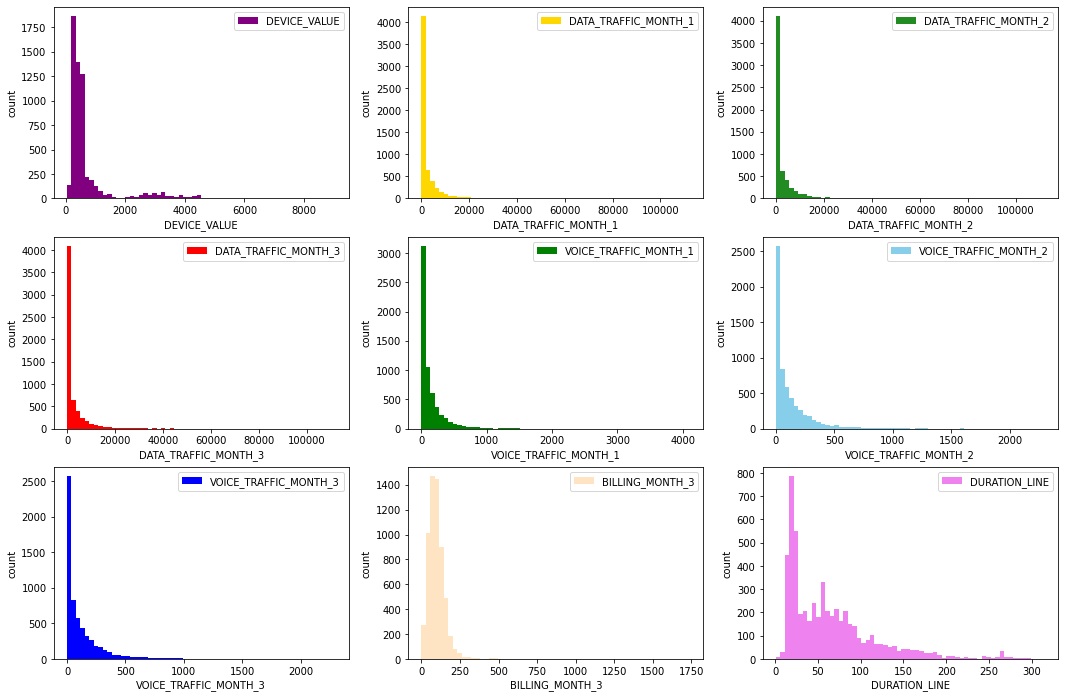

In [554]:
#Ploting a histogram of DEVICE_VALUE, DATA_TRAFFIC_MONTH_1-3, VOICE_TRAFFIC_MONTH_1-3,  BILLING_MONTH_3, DURATION_LINE
fig,ax = plt.subplots(3,3)
fig.set_size_inches(18,12)
#We define the type of plot (histogram) and the color
ax[0,0].hist(input_dataset_clean2["DEVICE_VALUE"],color = "purple",bins= 60)
ax[0,1].hist(input_dataset_clean2["DATA_TRAFFIC_MONTH_1"],color = "gold",bins= 60)
ax[0,2].hist(input_dataset_clean2["DATA_TRAFFIC_MONTH_2"],color = "forestgreen",bins= 60)
ax[1,0].hist(input_dataset_clean2["DATA_TRAFFIC_MONTH_3"],color = "red",bins= 60)
ax[1,1].hist(input_dataset_clean2["VOICE_TRAFFIC_MONTH_1"],color = "green",bins= 60)
ax[1,2].hist(input_dataset_clean2["VOICE_TRAFFIC_MONTH_2"],color = "skyblue",bins= 60)
ax[2,0].hist(input_dataset_clean2["VOICE_TRAFFIC_MONTH_3"],color = "blue",bins= 60)
ax[2,1].hist(input_dataset_clean2["BILLING_MONTH_3"],color = "bisque",bins= 60)
ax[2,2].hist(input_dataset_clean2["DURATION_LINE"],color = "violet",bins= 60)
#We define the legend (in this case we put the atribute that we plot)
ax[0,0].legend(["DEVICE_VALUE"])
ax[0,1].legend(["DATA_TRAFFIC_MONTH_1"])
ax[0,2].legend(["DATA_TRAFFIC_MONTH_2"])
ax[1,0].legend(["DATA_TRAFFIC_MONTH_3"])
ax[1,1].legend(["VOICE_TRAFFIC_MONTH_1"])
ax[1,2].legend(["VOICE_TRAFFIC_MONTH_2"])
ax[2,0].legend(["VOICE_TRAFFIC_MONTH_3"])
ax[2,1].legend(["BILLING_MONTH_3"])
ax[2,2].legend(["DURATION_LINE"])
#We define the x label 
ax[0,0].set_xlabel("DEVICE_VALUE")
ax[0,1].set_xlabel("DATA_TRAFFIC_MONTH_1")
ax[0,2].set_xlabel("DATA_TRAFFIC_MONTH_2")
ax[1,0].set_xlabel("DATA_TRAFFIC_MONTH_3")
ax[1,1].set_xlabel("VOICE_TRAFFIC_MONTH_1")
ax[1,2].set_xlabel("VOICE_TRAFFIC_MONTH_2")
ax[2,0].set_xlabel("VOICE_TRAFFIC_MONTH_3")
ax[2,1].set_xlabel("BILLING_MONTH_3")
ax[2,2].set_xlabel("DURATION_LINE")
#We define the y label
ax[0,0].set_ylabel("count")
ax[0,1].set_ylabel("count")
ax[0,2].set_ylabel("count")
ax[1,0].set_ylabel("count")
ax[1,1].set_ylabel("count")
ax[1,2].set_ylabel("count")
ax[2,0].set_ylabel("count")
ax[2,1].set_ylabel("count")
ax[2,2].set_ylabel("count")
#poner las axis
plt.show()

Each color represent a different atribute.We need more information about the variables the determine its distribution but they are similar of a exponencial distribution all of them. They are unimodal, we do not have 2 peaks in the histogram. The 2 distributions more differents are BILLING_MONTH_3 that is similar to a normal distribution and DURATION_LINE that have something similar to a 2 peaks

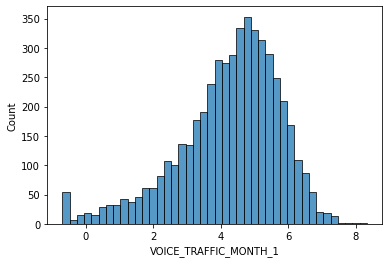

In [555]:
sns.histplot(np.log(input_dataset_clean2.VOICE_TRAFFIC_MONTH_1),kde=False)
plt.show()

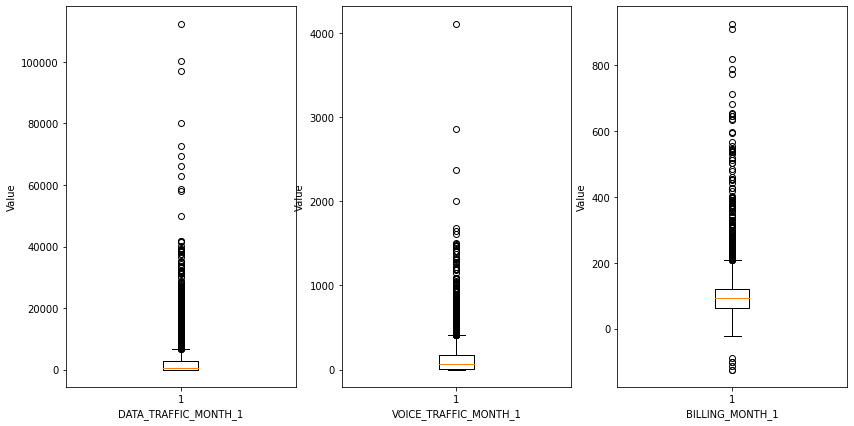

In [556]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(14,7)
ax[0].boxplot(input_dataset_clean2["DATA_TRAFFIC_MONTH_1"])
ax[1].boxplot(input_dataset_clean2["VOICE_TRAFFIC_MONTH_1"])
ax[2].boxplot(input_dataset_clean2["BILLING_MONTH_1"])

ax[0].set_xlabel("DATA_TRAFFIC_MONTH_1")
ax[1].set_xlabel("VOICE_TRAFFIC_MONTH_1")
ax[2].set_xlabel("BILLING_MONTH_1")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("Value")
ax[2].set_ylabel("Value")

plt.show()

As we can see the boxplots are telling us the same like the histogram. The majority of the values have small values but later we have few values with high numbers, for this kind of distribution is dificult to determine a good theshold because it could be normal high numbers but for a statistical definition, we can say that the values highers than 3std are outliers, the 3 signa rule

In [557]:
cols = np.arange(3,27)
cols = np.append(1,cols)
cols = np.append(cols,29)
#We take the index of the colums that we want to see the correlation
corr = input_dataset_clean2.iloc[:,cols].corr()
corr

,DEVICE_VALUE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,...,BILLING_MONTH_4,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DURATION_LINE
DEVICE_VALUE,1.000000,0.116561,0.113921,0.115521,0.118570,0.126396,0.118783,0.023954,0.027272,0.027570,...,0.106505,0.099692,0.098457,0.079026,0.081716,0.115822,0.106747,0.112281,0.114915,0.025068
DATA_TRAFFIC_MONTH_1,0.116561,1.000000,0.756333,0.731075,0.701346,0.661925,0.623487,0.091497,0.071170,0.072724,...,0.197080,0.187757,0.192214,0.013154,0.053023,0.082138,0.078769,0.081845,0.082754,-0.010386
DATA_TRAFFIC_MONTH_2,0.113921,0.756333,1.000000,0.974986,0.790132,0.760661,0.689210,0.080655,0.082591,0.083516,...,0.194977,0.189966,0.197687,0.012789,0.048059,0.063214,0.068586,0.069624,0.072095,0.005628
DATA_TRAFFIC_MONTH_3,0.115521,0.731075,0.974986,1.000000,0.814513,0.771017,0.696484,0.082316,0.084456,0.084809,...,0.200426,0.194440,0.204056,0.013616,0.050280,0.064950,0.069882,0.070833,0.073042,0.005655
DATA_TRAFFIC_MONTH_4,0.118570,0.701346,0.790132,0.814513,1.000000,0.826757,0.721067,0.086213,0.087458,0.087728,...,0.203949,0.207142,0.219507,0.012147,0.048129,0.067395,0.065312,0.068391,0.071571,-0.016521
DATA_TRAFFIC_MONTH_5,0.126396,0.661925,0.760661,0.771017,0.826757,1.000000,0.803762,0.089065,0.093805,0.095652,...,0.220148,0.206180,0.223316,0.007332,0.034486,0.072542,0.056567,0.058195,0.061078,0.003801
DATA_TRAFFIC_MONTH_6,0.118783,0.623487,0.689210,0.696484,0.721067,0.803762,1.000000,0.079204,0.076069,0.077673,...,0.204711,0.190584,0.200456,0.014574,0.050862,0.090871,0.071097,0.074176,0.079120,0.001765
VOICE_TRAFFIC_MONTH_1,0.023954,0.091497,0.080655,0.082316,0.086213,0.089065,0.079204,1.000000,0.815295,0.799665,...,0.125612,0.128770,0.136608,-0.008698,0.000574,0.009114,0.003552,0.006573,0.011290,0.017118
VOICE_TRAFFIC_MONTH_2,0.027272,0.071170,0.082591,0.084456,0.087458,0.093805,0.076069,0.815295,1.000000,0.982587,...,0.105186,0.112065,0.118259,-0.006293,0.004728,-0.003244,0.001499,0.001619,0.003926,0.028017
VOICE_TRAFFIC_MONTH_3,0.027570,0.072724,0.083516,0.084809,0.087728,0.095652,0.077673,0.799665,0.982587,1.000000,...,0.107572,0.113864,0.117191,-0.005919,0.005817,-0.002401,0.002626,0.002678,0.005525,0.029267


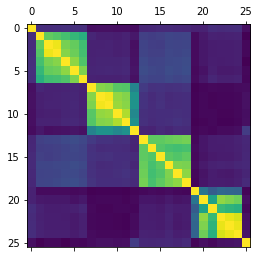

In [558]:
#We plot the correlation between atributes
plt.matshow(corr)
plt.show()

As we can see there is no atribute that has more than 0.12 correlation value so that means that DEVICE_VALUE is not correlated with any of the atributes, because usually, a high correlations are with values of correlations higher than 0.7

## 2.3. Date management and period calculation

In [559]:
input_dataset_clean3 = input_dataset_clean2.copy()
values = []
#We calculate the difference between dates for each value of LAST_DEVICE_CHANGE
#And if we have a NULL whe put NaN
for value in input_dataset_clean3.LAST_DEVICE_CHANGE:
    if not pd.isnull(value):
        val = date.today() - value.date()
        #Value in months dividing by 30
        values.append(val.days/30)
    else:
        values.append(np.nan)
input_dataset_clean3.MONTHS_LAST_DEVICE = values
input_dataset_clean3.MONTHS_LAST_DEVICE

0             NaN
1       55.000000
2             NaN
3       48.900000
4       33.666667
          ...    
9994          NaN
9995    55.000000
9996    42.833333
9997          NaN
9999          NaN
Name: MONTHS_LAST_DEVICE, Length: 5988, dtype: float64

The value that we have now in MONTHS_LAST_DEVICE colum is the difference between today and LAST_DEVICE_CHANGE in months dividing by 30, the nulls values are computed as NaN

In [560]:
input_dataset_clean4 = input_dataset_clean3.copy()
values = []
#We calculate the difference between dates for each LINE_ACTIVATION_DATE value
#And if we have a NULL whe put NaN
for value in input_dataset_clean4.LINE_ACTIVATION_DATE:
    if not pd.isnull(value):
        val = date.today() - value.date()
        values.append(val.days)
    else:
        values.append(np.nan)
input_dataset_clean4.DURATION_LINE = values
print(input_dataset_clean4.DURATION_LINE,"\n")
print("Mean in days:",np.mean(input_dataset_clean4.DURATION_LINE))
print("Mean in years:",np.mean(input_dataset_clean4.DURATION_LINE)/365)

0       6135.0
1       1646.0
2       6387.0
3       3696.0
4       2669.0
         ...  
9994    2299.0
9995    1632.0
9996    3117.0
9997    3888.0
9999    3888.0
Name: DURATION_LINE, Length: 5988, dtype: float64 

Mean in days: 2810.7665416098225
Mean in years: 7.700730250985815


## 2.4. Standarization of numerical variables

In [561]:
input_dataset_clean5 = input_dataset_clean4.copy()
columns = ["DATA_TRAFFIC_MONTH_1","VOICE_TRAFFIC_MONTH_1","BILLING_MONTH_1","DEVICE_COST_MONTH_1"]

for col in columns:
    #We define the scaler
    scaler = StandardScaler()
    #We reshape the data because we have only one single feature
    values = array(input_dataset_clean5[col]).reshape(-1,1)
    #We use fit to compute the sd and mean that are need it for the standarization
    scaler.fit(values)
    #We transform and we store it at a new column
    col_name = col + "_STAND"
    input_dataset_clean5[col_name] = scaler.transform(values)
#We show the final dataset
input_dataset_clean5

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_STAND,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaT,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,2004-12-20,NaN,6135.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.361918,-0.414888,-0.196703,0.019216
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,2017-04-05,55.000000,1646.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung,-0.402274,-0.633700,-0.800894,-0.109773
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaT,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,2004-04-12,NaN,6387.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.358563,-0.521796,0.346838,-0.109773
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,2011-08-25,48.900000,3696.0,iPhone 6,Apple Inc,Apple,0.294532,0.225559,-0.602781,-0.045279
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,2014-06-17,33.666667,2669.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros,0.425926,1.265663,0.171507,-0.109773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaT,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,2015-06-22,NaN,2299.0,iPhone 6S,Apple Inc,Apple,1.468257,2.334242,0.991976,-0.109773
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,2017-04-19,55.000000,1632.0,iPhone 7 Plus,Apple Inc,Apple,3.805321,0.584250,-0.717000,-0.109773
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,2018-04-01,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,2013-03-26,42.833333,3117.0,Samsung Galaxy J7,Samsung Korea,Samsung,-0.267956,-0.210065,0.545567,-0.013031
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaT,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,2011-02-14,NaN,3888.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.409732,-0.459850,1.188857,-0.109773


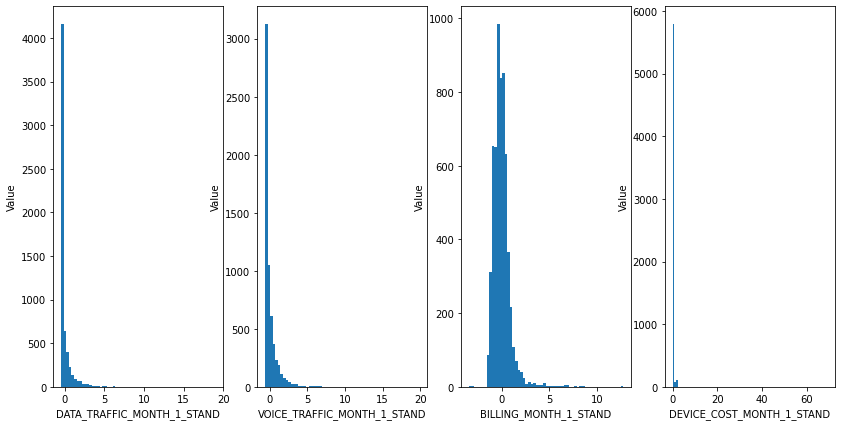

In [562]:
#We plot this new atributes
fig,ax = plt.subplots(1,4)
fig.set_size_inches(14,7)
ax[0].hist(input_dataset_clean5["DATA_TRAFFIC_MONTH_1_STAND"],bins=60)
ax[1].hist(input_dataset_clean5["VOICE_TRAFFIC_MONTH_1_STAND"],bins=60)
ax[2].hist(input_dataset_clean5["BILLING_MONTH_1_STAND"],bins=60)
ax[3].hist(input_dataset_clean5["DEVICE_COST_MONTH_1_STAND"],bins=90)

ax[0].set_xlabel("DATA_TRAFFIC_MONTH_1_STAND")
ax[1].set_xlabel("VOICE_TRAFFIC_MONTH_1_STAND")
ax[2].set_xlabel("BILLING_MONTH_1_STAND")
ax[3].set_xlabel("DEVICE_COST_MONTH_1_STAND")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("Value")
ax[2].set_ylabel("Value")
ax[3].set_ylabel("Value")

plt.show()

We can see that now the values are standarized

In [563]:
input_dataset_clean6 = input_dataset_clean5.copy()
columns = ["DATA_TRAFFIC_MONTH_1","VOICE_TRAFFIC_MONTH_1","BILLING_MONTH_1","DEVICE_COST_MONTH_1"]
#We define the normalizer
norm = Normalizer()
for col in columns:
    #We reshape the data because we have only one single feature
    values = array(input_dataset_clean6[col]).reshape(-1,1)
    #We transform and we store it at a new column
    col_name = col + "_NORM"
    input_dataset_clean6[col_name] = norm.transform(values)
#We show the final dataset
input_dataset_clean6

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND,DATA_TRAFFIC_MONTH_1_STAND,VOICE_TRAFFIC_MONTH_1_STAND,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaT,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.361918,-0.414888,-0.196703,0.019216,1.0,1.0,1.0,1.0
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,Samsung Korea,Samsung,-0.402274,-0.633700,-0.800894,-0.109773,1.0,1.0,1.0,0.0
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaT,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.358563,-0.521796,0.346838,-0.109773,1.0,1.0,1.0,0.0
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,Apple Inc,Apple,0.294532,0.225559,-0.602781,-0.045279,1.0,1.0,1.0,1.0
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,"Motorola Mobility LLC, a Lenovo Company",Outros,0.425926,1.265663,0.171507,-0.109773,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaT,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,Apple Inc,Apple,1.468257,2.334242,0.991976,-0.109773,1.0,1.0,1.0,0.0
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,Apple Inc,Apple,3.805321,0.584250,-0.717000,-0.109773,1.0,1.0,1.0,0.0
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,2018-04-01,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,Samsung Korea,Samsung,-0.267956,-0.210065,0.545567,-0.013031,1.0,1.0,1.0,1.0
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaT,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,"Motorola Mobility LLC, a Lenovo Company",Motorola,-0.409732,-0.459850,1.188857,-0.109773,1.0,1.0,1.0,0.0


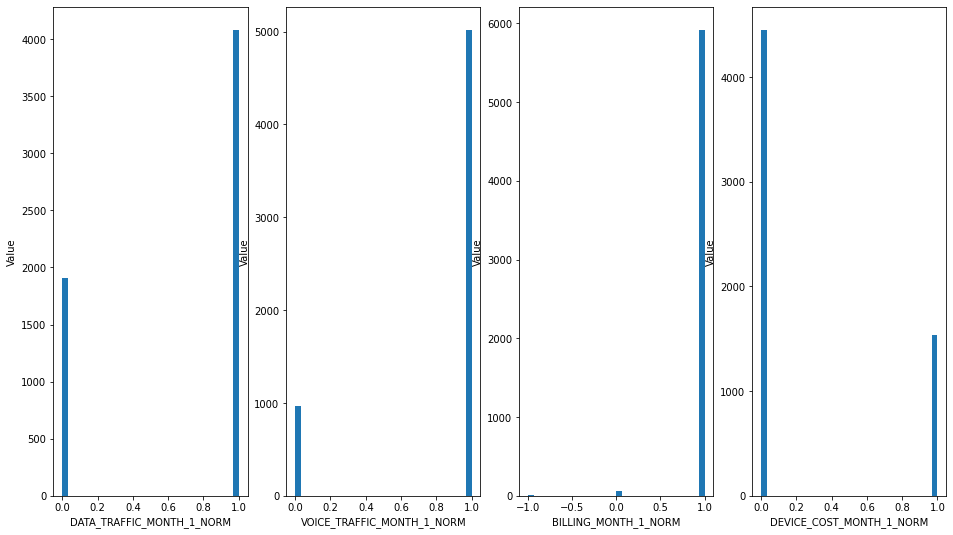

In [564]:
#We plot this new atributes
fig,ax = plt.subplots(1,4)
fig.set_size_inches(16,9)
ax[0].hist(input_dataset_clean6["DATA_TRAFFIC_MONTH_1_NORM"],bins=30)
ax[1].hist(input_dataset_clean6["VOICE_TRAFFIC_MONTH_1_NORM"],bins=30)
ax[2].hist(input_dataset_clean6["BILLING_MONTH_1_NORM"],bins=30)
ax[3].hist(input_dataset_clean6["DEVICE_COST_MONTH_1_NORM"],bins=30)

ax[0].set_xlabel("DATA_TRAFFIC_MONTH_1_NORM")
ax[1].set_xlabel("VOICE_TRAFFIC_MONTH_1_NORM")
ax[2].set_xlabel("BILLING_MONTH_1_NORM")
ax[3].set_xlabel("DEVICE_COST_MONTH_1_NORM")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("Value")
ax[2].set_ylabel("Value")
ax[3].set_ylabel("Value")

plt.show()

The result obviusly is incorrect, this is not the expected wen you normalize, in the histograms it supose to apear a normal distribution, but I do not found the error, i follow the same structure as in the tutorial and the same with standarization.

In [565]:
input_dataset_clean7 = input_dataset_clean6.copy()
columns = ["DATA_TRAFFIC_MONTH_1","VOICE_TRAFFIC_MONTH_1","BILLING_MONTH_1","DEVICE_COST_MONTH_1"]

for col in columns:
    #We define the scaler
    minmax = MinMaxScaler()
    #We reshape the data because we have only one single feature
    values = array(input_dataset_clean7[col]).reshape(-1,1)
    #We use fit to compute the min and max values need it to compute minmax
    minmax.fit(values)
    #We transform and we store it at a new column
    col_name = col + "_MINMAXSC"
    input_dataset_clean7[col_name] = minmax.transform(values)
#We show the final dataset
input_dataset_clean7

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,BILLING_MONTH_1_STAND,DEVICE_COST_MONTH_1_STAND,DATA_TRAFFIC_MONTH_1_NORM,VOICE_TRAFFIC_MONTH_1_NORM,BILLING_MONTH_1_NORM,DEVICE_COST_MONTH_1_NORM,DATA_TRAFFIC_MONTH_1_MINMAXSC,VOICE_TRAFFIC_MONTH_1_MINMAXSC,BILLING_MONTH_1_MINMAXSC,DEVICE_COST_MONTH_1_MINMAXSC
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaT,465.24673,530.80615,530.80615,781.126460,398.993770,1169.39610,47.50000,...,-0.196703,0.019216,1.0,1.0,1.0,1.0,0.004138,0.011549,0.201028,0.001863
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-04-01,232.24121,272.25525,272.25525,704.885190,412.716640,365.14441,3.70000,...,-0.800894,-0.109773,1.0,1.0,1.0,0.0,0.002066,0.000900,0.163679,0.000000
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaT,484.62036,264.13843,264.13843,348.500730,380.441560,250.73566,26.10000,...,0.346838,-0.109773,1.0,1.0,1.0,0.0,0.004311,0.006346,0.234627,0.000000
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,2017-10-01,4255.46040,836.11707,836.11707,691.556400,146.766600,302.49249,175.70000,...,-0.602781,-0.045279,1.0,1.0,1.0,1.0,0.037853,0.042718,0.175925,0.000932
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,2019-01-01,5014.10300,2659.05150,2659.05150,2435.039300,2053.979500,1553.11500,383.89999,...,0.171507,-0.109773,1.0,1.0,1.0,0.0,0.044601,0.093338,0.223789,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,NaT,11032.31700,5755.06540,5755.06540,5290.147500,2917.549800,4494.50200,597.79999,...,0.991976,-0.109773,1.0,1.0,1.0,0.0,0.098134,0.145344,0.274508,0.000000
9995,TGMO36762000_MOTOROLA XT1941 SMARTPHONE PRETO,1041.0,2017-04-01,24526.06600,14820.21800,14820.21800,19684.520000,10024.089000,7423.10740,247.50000,...,-0.717000,-0.109773,1.0,1.0,1.0,0.0,0.218162,0.060175,0.168865,0.000000
9996,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,2018-04-01,1007.76560,335.01740,335.01740,171.912730,555.694210,425.69946,88.50000,...,0.545567,-0.013031,1.0,1.0,1.0,1.0,0.008964,0.021517,0.246912,0.001398
9997,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,585.0,NaT,189.17578,155.54840,155.54840,51.755936,62.371407,230.53328,38.50000,...,1.188857,-0.109773,1.0,1.0,1.0,0.0,0.001683,0.009361,0.286678,0.000000


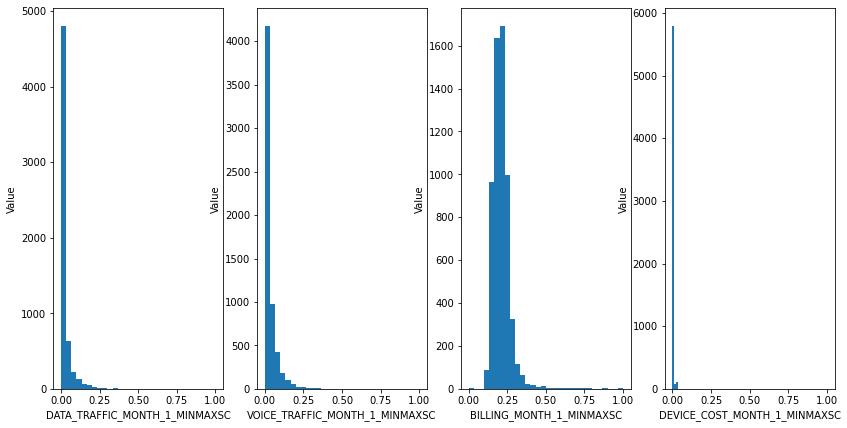

In [566]:
#We plot this new atributes
fig,ax = plt.subplots(1,4)
fig.set_size_inches(14,7)
ax[0].hist(input_dataset_clean7["DATA_TRAFFIC_MONTH_1_MINMAXSC"],bins=30)
ax[1].hist(input_dataset_clean7["VOICE_TRAFFIC_MONTH_1_MINMAXSC"],bins=30)
ax[2].hist(input_dataset_clean7["BILLING_MONTH_1_MINMAXSC"],bins=30)
ax[3].hist(input_dataset_clean7["DEVICE_COST_MONTH_1_MINMAXSC"],bins=90)

ax[0].set_xlabel("DATA_TRAFFIC_MONTH_1_MINMAXSC")
ax[1].set_xlabel("VOICE_TRAFFIC_MONTH_1_MINMAXSC")
ax[2].set_xlabel("BILLING_MONTH_1_MINMAXSC")
ax[3].set_xlabel("DEVICE_COST_MONTH_1_MINMAXSC")

ax[0].set_ylabel("Value")
ax[1].set_ylabel("Value")
ax[2].set_ylabel("Value")
ax[3].set_ylabel("Value")

plt.show()

As we can see at the histograms there is no bimodal distributions in this plots there are similar plots like with the standarization but with diferent scale, the scale in minmax is between 0 and 1, that is the expected scale

## 2.5. Convert categorical columns to dummy binary variables

In [567]:
input_dataset_clean8 = input_dataset_clean7.copy()
#PREVIOUS_DEVICE_BRAND
#We create the df with the dummies 
dum = pd.get_dummies(input_dataset_clean8.PREVIOUS_DEVICE_BRAND)
#Now we unite the two dataframes
frames = [input_dataset_clean8, dum]
input_dataset_clean8 = pd.concat(frames,axis = 1)
input_dataset_clean8.iloc[:,[45,46,47,48,49]]

,Apple,LG,Motorola,Outros,Samsung
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,1,0,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
9994,1,0,0,0,0
9995,1,0,0,0,0
9996,0,0,0,0,1
9997,0,0,1,0,0


We can see that now we have 5 atributes more, one to each different value, if the value of Apple is 1 this mean that the PREVIOUS_DEVICE_BRAND atribute is Apple. This is usefull for a lot of algoritms and problems like Association Pattern Mining.

In [568]:
input_dataset_clean9 = input_dataset_clean8.copy()
#PREVIOUS_DEVICE_MODEL
#We create the label Encoder
label = LabelEncoder()
#We fit the encoder
label.fit(input_dataset_clean9.PREVIOUS_DEVICE_MODEL.unique())
#We transform the variable to numeric
input_dataset_clean9["PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD"] = label.transform(input_dataset_clean9.PREVIOUS_DEVICE_MODEL)
input_dataset_clean9.iloc[:,[50]]

,PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD
0,274
1,435
2,264
3,566
4,153
...,...
9994,568
9995,571
9996,443
9997,264


Now we have 1 number to each PREVIOUS_DEVICE_MODEL, this is not necessary in some language programing like R because internally it treats it as a integer the diferent values.

## 2.6. Feature generation

In [579]:
input_dataset_clean10 = input_dataset_clean9.copy()
#We compute the mean for each variable between its months
input_dataset_clean10["DATA_TRAFFIC_MEAN"] = input_dataset_clean10[
                                    ["DATA_TRAFFIC_MONTH_1","DATA_TRAFFIC_MONTH_2"
                                     ,"DATA_TRAFFIC_MONTH_3","DATA_TRAFFIC_MONTH_4",
                                    "DATA_TRAFFIC_MONTH_5","DATA_TRAFFIC_MONTH_6"]].apply(np.mean,axis=1)
input_dataset_clean10["VOICE_TRAFFIC_MEAN"] = input_dataset_clean10[
                                    ["VOICE_TRAFFIC_MONTH_1","VOICE_TRAFFIC_MONTH_2"
                                     ,"VOICE_TRAFFIC_MONTH_3","VOICE_TRAFFIC_MONTH_4",
                                    "VOICE_TRAFFIC_MONTH_5","VOICE_TRAFFIC_MONTH_6"]].apply(np.mean,axis=1)
input_dataset_clean10["BILLING_MEAN"] = input_dataset_clean10[
                                    ["BILLING_MONTH_1","BILLING_MONTH_2"
                                    ,"BILLING_MONTH_3","BILLING_MONTH_4",
                                    "BILLING_MONTH_5","BILLING_MONTH_6"]].apply(np.mean,axis=1)
input_dataset_clean10["DEVICE_COST_MEAN"] = input_dataset_clean10[
                                    ["DEVICE_COST_MONTH_1","DEVICE_COST_MONTH_2"
                                     ,"DEVICE_COST_MONTH_3","DEVICE_COST_MONTH_4",
                                    "DEVICE_COST_MONTH_5","DEVICE_COST_MONTH_6"]].apply(np.mean,axis=1)
input_dataset_clean10.iloc[:,[51,52,53,54]]

,DATA_TRAFFIC_MEAN,VOICE_TRAFFIC_MEAN,BILLING_MEAN,DEVICE_COST_MEAN
0,646.062560,40.716666,92.958333,12.0
1,376.582992,3.066667,49.435000,0.0
2,332.095862,114.100000,121.781667,0.0
3,1178.085005,185.300000,58.216667,6.0
4,2729.056633,63.983332,109.700000,0.0
...,...,...,...,...
9994,5874.107850,655.066662,176.405000,0.0
9995,15216.369733,215.116668,52.486667,0.0
9996,471.851133,14.750000,134.990000,9.0
9997,140.822200,6.416667,157.480000,0.0


This is usefull too for reduccion of the dimensionallity because we can compress all data_traffic months in one single atribute

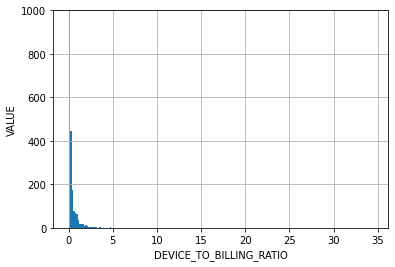

In [570]:
input_dataset_clean11 = input_dataset_clean10.copy()
#We compute the ratio as the division between DEVICE_COST_MEAN and BILLING_MEAN
input_dataset_clean11["DEVICE_TO_BILLING_RATIO"] = input_dataset_clean11["DEVICE_COST_MEAN"] / input_dataset_clean11["BILLING_MEAN"]
input_dataset_clean11["DEVICE_TO_BILLING_RATIO"].hist(bins=200)
plt.ylim([0,1000])
plt.xlabel("DEVICE_TO_BILLING_RATIO")
plt.ylabel("VALUE")
plt.show()

As others distributions that we saw in this practise this distribution it remains me a exponential distribution, but we need more information to determine

## 2.7. Text parsing/processing

In [571]:
input_dataset_clean12 = input_dataset_clean11.copy()
# "device_code"+"_"+"manufacture name"+" "+"device model"
#We use the regular expresion '_| ' because we know that the code and the name 
#are separated by _ and the device model start after the first white space
str_cols = input_dataset_clean12.PURCHASED_DEVICE.str.split("_| ")
values = []
for record in str_cols:
    #We do some treatment to have this 3 variables as we want
    values.append([record[0],record[1]," ".join(record[2:])])
str_cols1 = pd.DataFrame(values)
#We rename the columns
str_cols1.rename(columns={0 : "PURCHASED_DEVICE_CODE",1 : "PURCHASED_DEVICE_MANUFACTURER",
                         2: "PURCHASED_DEVICE_MODEL"},inplace=True)
input_dataset_clean12["PURCHASED_DEVICE_CODE"] = array(str_cols1["PURCHASED_DEVICE_CODE"])
input_dataset_clean12["PURCHASED_DEVICE_MANUFACTURER"] = array(str_cols1["PURCHASED_DEVICE_MANUFACTURER"])
input_dataset_clean12["PURCHASED_DEVICE_MODEL"] = array(str_cols1["PURCHASED_DEVICE_MODEL"])

input_dataset_clean12.iloc[:,[56,57,58]]

,PURCHASED_DEVICE_CODE,PURCHASED_DEVICE_MANUFACTURER,PURCHASED_DEVICE_MODEL
0,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
1,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
2,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
3,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
4,TGMO35912000,MOTOROLA,XT1922 SMARTPHONE INDIGO
...,...,...,...
9994,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9995,TGMO36762000,MOTOROLA,XT1941 SMARTPHONE PRETO
9996,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07
9997,TGLG29162000,LG,X210BMW SMARTPHONE PRETO PPB/P1769/07


In [572]:
print(input_dataset_clean12.PURCHASED_DEVICE_MANUFACTURER.value_counts(),"\n")
print(input_dataset_clean12.PREVIOUS_DEVICE_MANUF.value_counts())

LG          3556
SAMSUNG     1094
MOTOROLA     630
APPLE        448
ALCATEL      258
ASUS           2
Name: PURCHASED_DEVICE_MANUFACTURER, dtype: int64 

Samsung Korea                              1879
Apple Inc                                  1495
Motorola Mobility LLC, a Lenovo Company     849
LG Electronics Inc.                         506
TCL Communication Ltd                       279
                                           ... 
HTC Corporation                               1
Motorola                                      1
Lidaxin Technology Limited                    1
Deere and Company                             1
Hongkong IPRO Technology Co Limited           1
Name: PREVIOUS_DEVICE_MANUF, Length: 67, dtype: int64


We can see that the most PURCHASED_DEVICE_MANUFACTURER that we have in the dataset is LG with a total of 3556

## 2.8. Splitting and sampling a dataset

In [573]:
X_train, X_test = train_test_split(input_dataset_clean12,test_size=0.3)
print(X_train)
print(X_test)

                                       PURCHASED_DEVICE  DEVICE_VALUE  \
3563  TGSA31962007_SAMSUNG J410G SMART PRETO PPB/PI1...         489.0   
4379  TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...        1089.0   
5873  TGSA31562000_SAMSUNG J810M SMART PRETO PPB/PI1...         605.0   
3179  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...         321.0   
7289  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...         217.0   
...                                                 ...           ...   
2880  DGAP086C3000_APPLE IPHONE XS MAX 256GB CINZA E...        8049.0   
9283  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...         297.0   
5090  TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P...         633.0   
8904  TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...         297.0   
6216  TGLG29462000_LG X410BCW SMARTPHONE PRETO PPB/P...         393.0   

     LAST_DEVICE_CHANGE  DATA_TRAFFIC_MONTH_1  DATA_TRAFFIC_MONTH_2  \
3563         2018-04-01            418.789460       

In [574]:
print(X_train["DATA_TRAFFIC_MONTH_1"].describe())
print(X_test["DATA_TRAFFIC_MONTH_1"].describe(),"\n")

print(X_train["VOICE_TRAFFIC_MONTH_1"].describe())
print(X_test["VOICE_TRAFFIC_MONTH_1"].describe(),"\n")

print(X_train["BILLING_MONTH_1"].describe())
print(X_test["BILLING_MONTH_1"].describe())

count      4191.000000
mean       2521.808646
std        5783.654852
min           0.000000
25%           0.000000
50%         351.287510
75%        2596.643050
max      112421.170000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64
count     1797.000000
mean      2632.042533
std       5753.240429
min          0.000000
25%          0.000000
50%        444.827880
75%       2908.133500
max      79988.180000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64 

count    4191.000000
mean      126.327678
std       188.861787
min         0.000000
25%        10.200000
50%        61.000000
75%       162.949995
max      2861.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64
count    1797.000000
mean      140.394769
std       224.144119
min         0.000000
25%         8.600000
50%        66.300003
75%       186.899990
max      4113.000000
Name: VOICE_TRAFFIC_MONTH_1, dtype: float64 

count    4191.000000
mean       98.352949
std        62.578051
min      -124.490000
25%        63.000000
50%        92.690000


As we can see with the describe() function the statistics differences between test and train datasets are not significative, only in some of the variables with the max value, but we can see that more or less are stadistical similar

# 3. Comparing iPhone and Samsung J series users

In [575]:
#We create the 2 datasets
data_apple = input_dataset_clean12[input_dataset_clean12.PURCHASED_DEVICE_MANUFACTURER == "APPLE"]
data_samgsum = input_dataset_clean12[input_dataset_clean12.PURCHASED_DEVICE_MANUFACTURER == "SAMSUNG"]

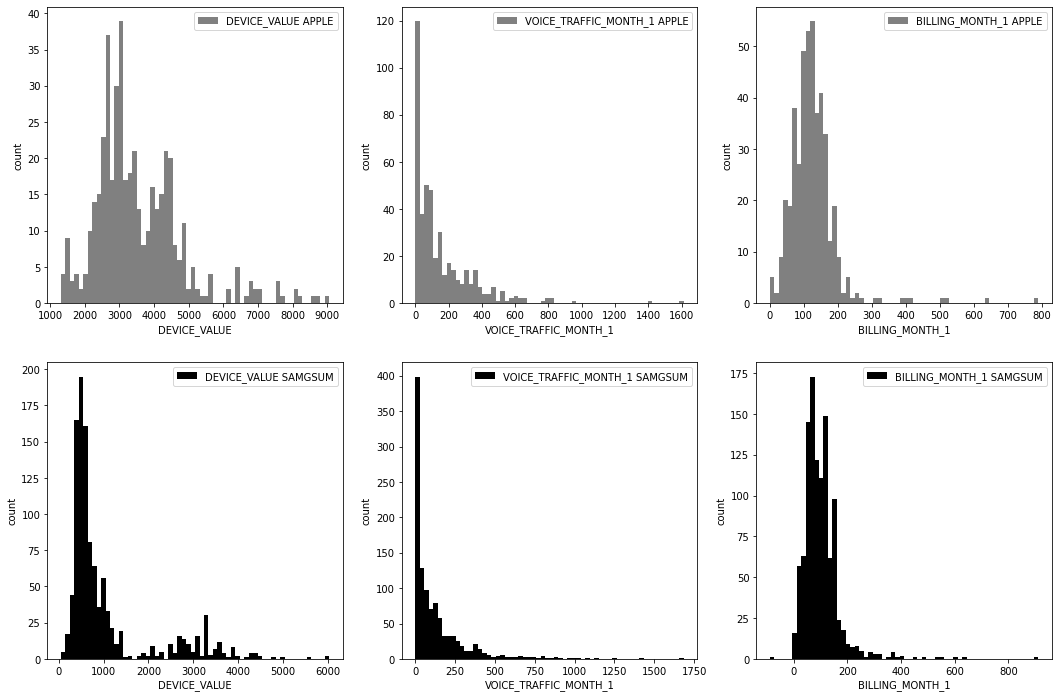

In [576]:
#Ploting the histograms 
fig,ax = plt.subplots(2,3)
fig.set_size_inches(18,12)
#We define the type of plot (histogram) and the color
#Grey color for apple, black for Samgsum
ax[0,0].hist(data_apple["DEVICE_VALUE"],color = "grey",bins= 60)
ax[0,1].hist(data_apple["VOICE_TRAFFIC_MONTH_1"],color = "grey",bins= 60)
ax[0,2].hist(data_apple["BILLING_MONTH_1"],color = "grey",bins= 60)
ax[1,0].hist(data_samgsum["DEVICE_VALUE"],color = "black",bins= 60)
ax[1,1].hist(data_samgsum["VOICE_TRAFFIC_MONTH_1"],color = "black",bins= 60)
ax[1,2].hist(data_samgsum["BILLING_MONTH_1"],color = "black",bins= 60)

#We define the legend (in this case we put the atribute that we plot)
ax[0,0].legend(["DEVICE_VALUE APPLE"])
ax[0,1].legend(["VOICE_TRAFFIC_MONTH_1 APPLE"])
ax[0,2].legend(["BILLING_MONTH_1 APPLE"])
ax[1,0].legend(["DEVICE_VALUE SAMGSUM"])
ax[1,1].legend(["VOICE_TRAFFIC_MONTH_1 SAMGSUM"])
ax[1,2].legend(["BILLING_MONTH_1 SAMGSUM"])

#We define the x label 
ax[0,0].set_xlabel("DEVICE_VALUE")
ax[0,1].set_xlabel("VOICE_TRAFFIC_MONTH_1")
ax[0,2].set_xlabel("BILLING_MONTH_1")
ax[1,0].set_xlabel("DEVICE_VALUE")
ax[1,1].set_xlabel("VOICE_TRAFFIC_MONTH_1")
ax[1,2].set_xlabel("BILLING_MONTH_1")
#We define the y label
ax[0,0].set_ylabel("count")
ax[0,1].set_ylabel("count")
ax[0,2].set_ylabel("count")
ax[1,0].set_ylabel("count")
ax[1,1].set_ylabel("count")
ax[1,2].set_ylabel("count")
#poner las axis
plt.show()

As we can see with the distributions on voice-traffic and billing month between companies are more or less equal, more or less have the same distributions, so that could have sense because this atributes don't depend on the mobile, but yes on the companie. But we can see differences with the device value, we can see that apple have more expensive mobiles phones, and this is more or less the reality so is interesting this to know it to buy a new mobile

<font size="+2" color="blue">Additional results: model purchased device</font>

In [578]:
from sklearn import tree
#First we split the data
#Into a test data and train data to later with the test data validate
#We are gona split with the rule of 75/25
#We only use the 3 atributes
#We use the encoded categorical atributes
#We drop the NaN values
input_dataset_clean13 = input_dataset_clean12.dropna(subset=['MONTHS_LAST_DEVICE']).copy()
X_train, X_test, y_train, y_test = train_test_split(
                        input_dataset_clean13[["PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD"
                        ,"Apple","LG","Motorola","Outros","Samsung"
                        ,"MONTHS_LAST_DEVICE"]]
                        ,input_dataset_clean13["PURCHASED_DEVICE_MANUFACTURER"]
                        , test_size=0.25)
#We create the decision tree 
d_tree = tree.DecisionTreeClassifier()
#We train the model
d_tree = d_tree.fit(X_train, y_train)
#And now we see the accurracy with the validation set
print("Acurracy Model 3 Atributes: ",sum(d_tree.predict(X_test) == y_test)/len(y_test))

#Now we are gona add 2 variables more
#I could be infromative atributes device_value and VOICE_TRAFFIC_MEAN
X_train2, X_test2, y_train2, y_test2 = train_test_split(
                        input_dataset_clean13[["PREVIOUS_DEVICE_MODEL_INTEGER_ENCOD"
                        ,"Apple","LG","Motorola","Outros","Samsung"
                        ,"MONTHS_LAST_DEVICE","DEVICE_VALUE","VOICE_TRAFFIC_MEAN"]]
                        , input_dataset_clean13["PURCHASED_DEVICE_MANUFACTURER"]
                        , test_size=0.25)

#We create the decision tree 
d_tree2 = tree.DecisionTreeClassifier()
#We train the model
d_tree2 = d_tree2.fit(X_train2, y_train2)
#And now we see the accurracy with the validation set
print("Acurracy Model 5 Atributes: ",sum(d_tree2.predict(X_test2) == y_test2)/len(y_test2))

Acurracy Model 3 Atributes:  0.48513986013986016
Acurracy Model 5 Atributes:  0.7945804195804196


As we can see the results of the first model were more or less good, comparing to clasifing completly raandom we have 0.5 acurracy compared to 1/5 accurracy at random (because we have 5 categories to predict), so this model is capable to explain some things of the y. When we add DEVICE_VALUE and VOICE_TRAFFIC_MEAN the acurracy up to 0.78 so, this variables are quite informatives and we achive one model that is capable to explain this response atribute.

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>